# Dengue Analysis

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('datasets\\dengue.csv')

In [3]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


print(df.head())
print("\nData Types:")
print(df.dtypes)

      Month  Year    Region  Dengue_Cases  Dengue_Deaths       Date
0   January  2016  Region I           705              1 2016-01-01
1  February  2016  Region I           374              0 2016-02-01
2     March  2016  Region I           276              0 2016-03-01
3     April  2016  Region I           240              2 2016-04-01
4       May  2016  Region I           243              1 2016-05-01

Data Types:
Month                    object
Year                      int64
Region                   object
Dengue_Cases              int64
Dengue_Deaths             int64
Date             datetime64[ns]
dtype: object


# On what year have the highest total dengue cases that have ever recorded?

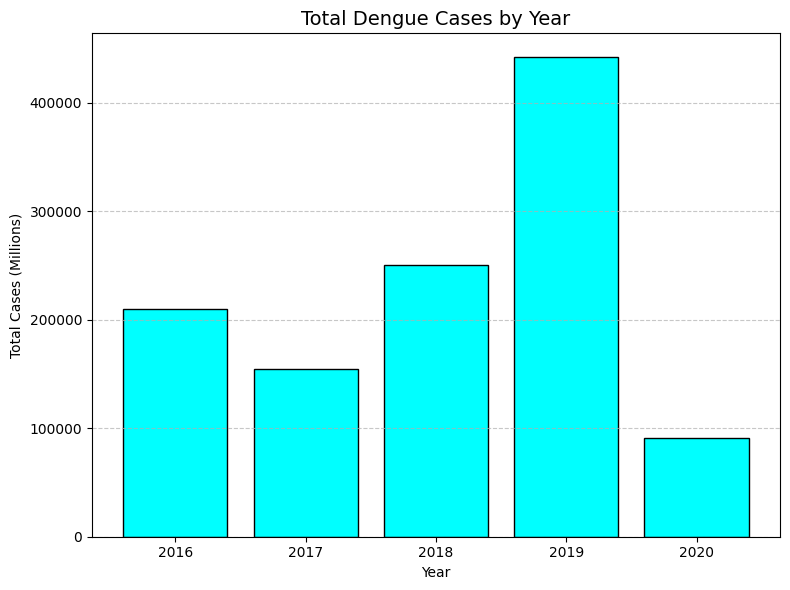

In [6]:
df_yearly = df.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df_yearly['Year'].astype(str), df_yearly['Dengue_Cases'], color='aqua', edgecolor='black')
plt.title('Total Dengue Cases by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Cases (Millions)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Insight 1
<p>On year 2019, Dengue Cases reach its highest peak while in year 2020, it reaches the lowest peak.</p> 
<hr>

# Since 2019 have the highest case of dengue, on what year does dengue took a lot of lives?

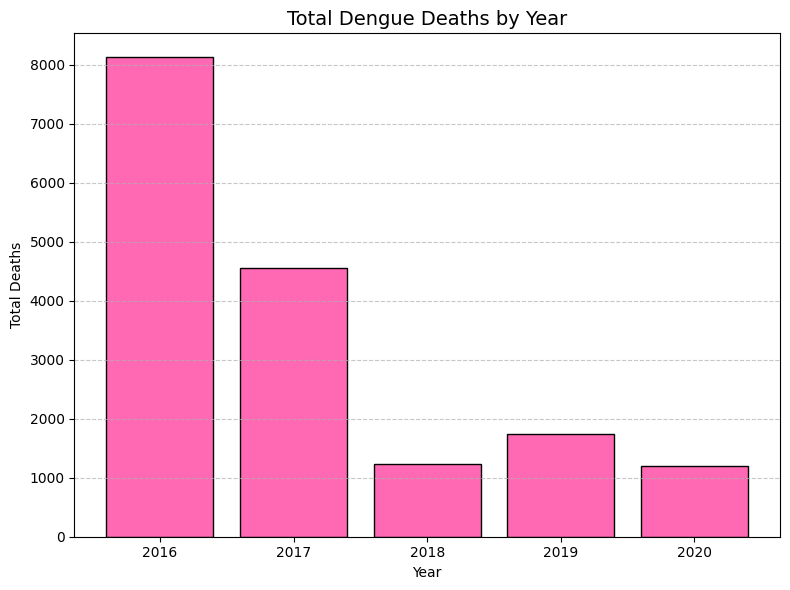

In [7]:
df_yearly_deaths = df.groupby('Year')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df_yearly_deaths['Year'].astype(str), df_yearly_deaths['Dengue_Deaths'], color='hotpink', edgecolor='black')
plt.title('Total Dengue Deaths by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Insight 2
<p>Surprisingly, 2016 have the most death with over 8000 in total.</p> 
<hr>

# What month does dengue cases often occur?

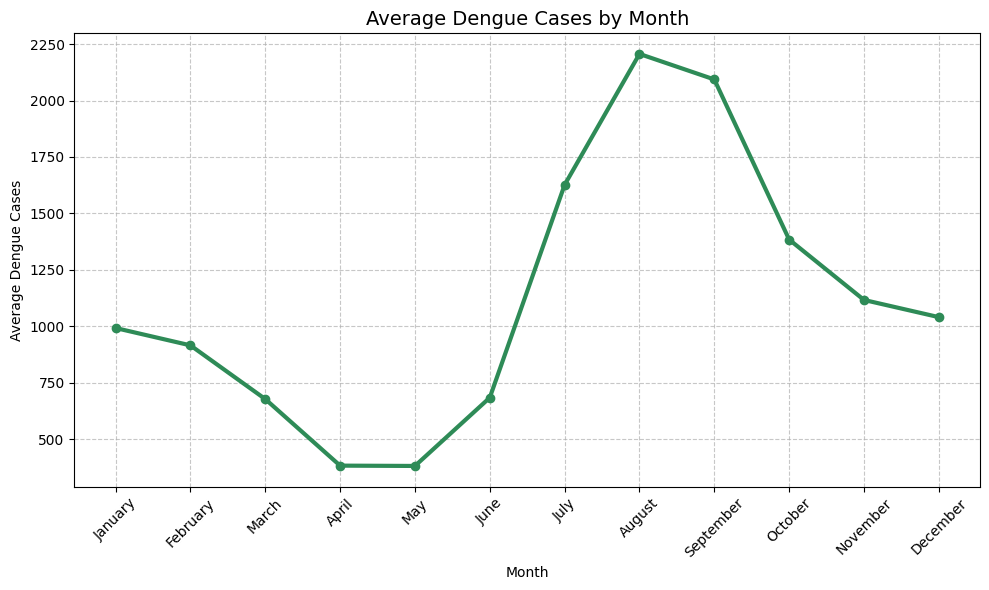

In [8]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df_monthly_avg = df.groupby('Month')['Dengue_Cases'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg['Month'], df_monthly_avg['Dengue_Cases'], marker='o', linestyle='-', color='seagreen', linewidth=3)
plt.title('Average Dengue Cases by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight 3 
<p>The month where cases of dengue highest occur is every August with the average cases of almost 2250 cases. </p> 

# Insight 4
<p>Meanwhile, April have the lowest average cases of dengue with only below 500 cases.</p>

# Insight 5
<p>The cases of dengue starts to peak at the month of July to February since it is rainy season and also where typhoons are often occur and because of it the mosquitoes are most likely to breed because of its environment. While March to June during dry season or summmer the cases of dengue are decreasing.</p> 
<hr>

# What are the top 5 regions with  most cases of dengue?

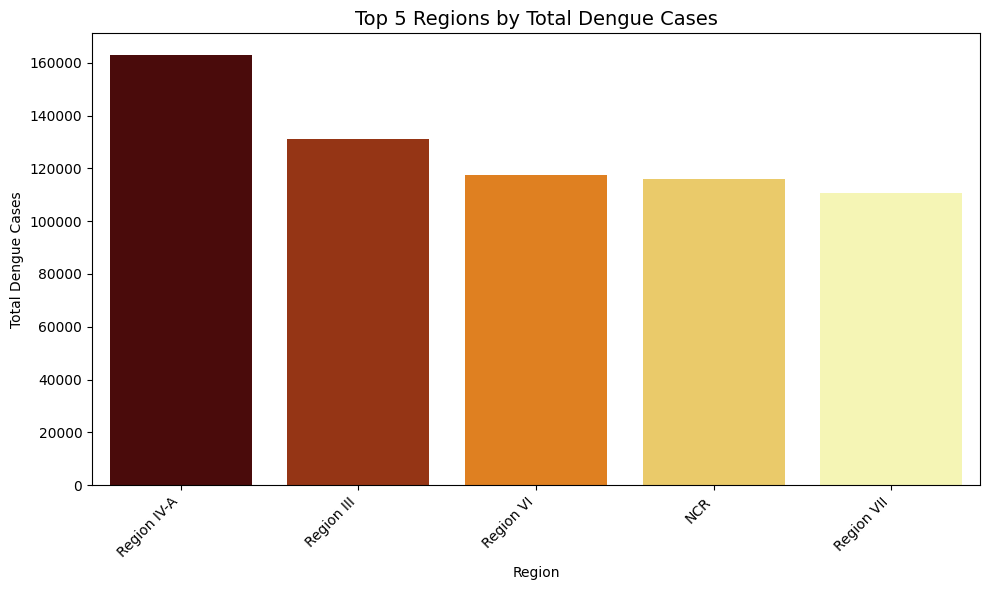

In [9]:
df_region_total = df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Dengue_Cases', data=df_region_total, palette='afmhot', hue='Region', legend=False)
plt.title('Top 5 Regions by Total Dengue Cases', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insight 6
<p>Region IV -A have the highest cases of dengue with the total of over 160,000 cases, along with Region III, IV, NCR and Region VII.</p>
<hr>

# Monthly Total Dengue Deaths Over time

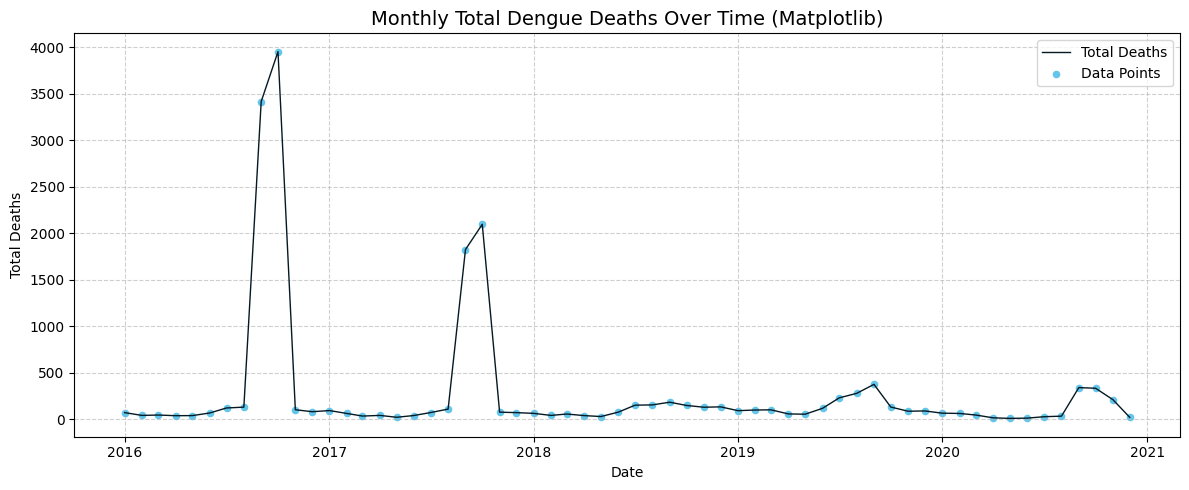

In [13]:
df_time = df.groupby('Date').agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()

plt.figure(figsize=(12, 5))

plt.plot(df_time['Date'], df_time['Dengue_Deaths'], color='#051923', linestyle='-', linewidth=1, label='Total Deaths')
plt.scatter(df_time['Date'], df_time['Dengue_Deaths'], color='#64c5eb', s=20, label='Data Points')
plt.title('Monthly Total Dengue Deaths Over Time (Matplotlib)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Insight 7
<p> On year 2016, the record of death due to dengue was drastically increase by the month of September and reaches its highest peak at the month of October. </p>

# Insight 8
<p> On year 2017, it was also the month of september where cases of death due to dengue started its peak and october as the highest month of death cases but compare to year 2016 it decreased for like a half of its cases.  </p>

# Insight 9
<p> On year 2018, the death cases of dengue suddenly decrease and it is stable as the cases did not go above 500 same as the year of 2019 - 2020 </p>
<hr>

# What is the average death of each region per month?

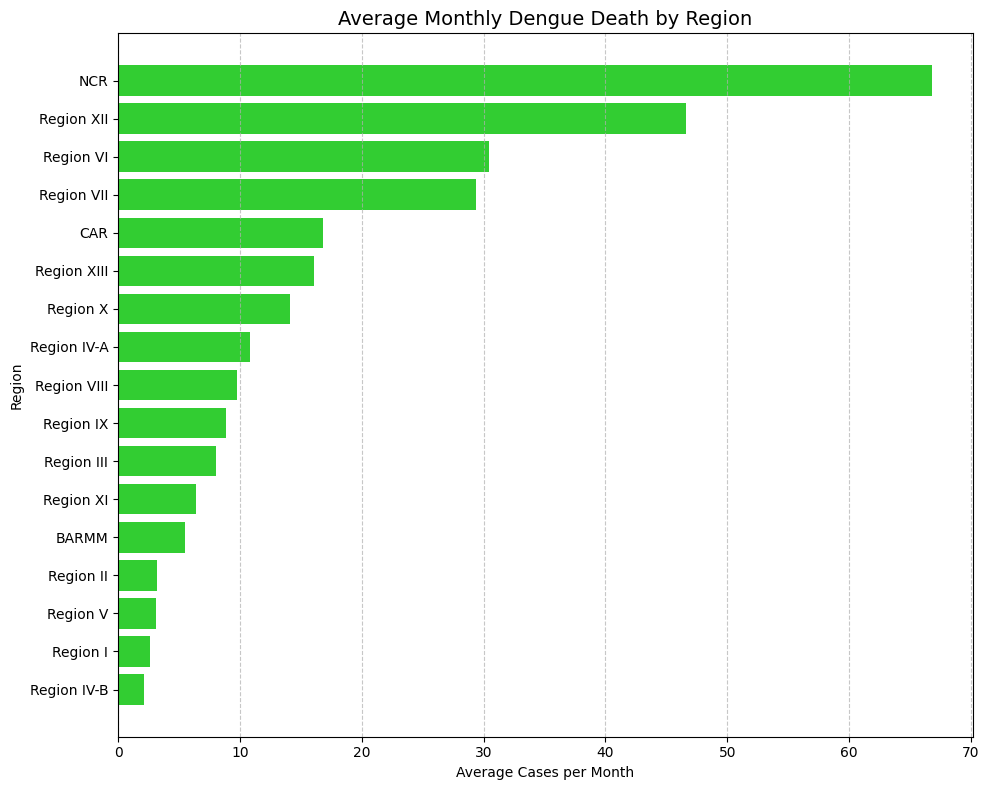

Region
Region IV-B     2.166667
Region I        2.616667
Region V        3.083333
Region II       3.216667
BARMM           5.533333
Region XI       6.416667
Region III      8.033333
Region IX       8.866667
Region VIII     9.750000
Region IV-A    10.866667
Region X       14.133333
Region XIII    16.100000
CAR            16.800000
Region VII     29.333333
Region VI      30.416667
Region XII     46.600000
NCR            66.800000
Name: Dengue_Deaths, dtype: float64


In [27]:
df_avg_region = df.groupby('Region')['Dengue_Deaths'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(df_avg_region.index, df_avg_region.values, color='limegreen')
plt.title('Average Monthly Dengue Death by Region', fontsize=14)
plt.xlabel('Average Cases per Month')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print (df_avg_region)

# Insight 10
<p> NCR have the highest average of death with 66.8 average, followed by Region XII with 46.6 and Region VI 30.4 . While Region IV-B have the lowest average of death cases due to dengue with  only 2.16 average.  </p>